### 绘制基因和AS的比例饼状图

+ `autopct`返回数据中的每个值，可以接受一个回调函数对这个值进行处理

+ `autopct=lambda pct: func(pct, data), `
   这里使用`lambada`定义了一个匿名函数,函数使用`autopct`返回的值`pact`作为匿名函数的输出参数，同时载匿名函数中调用先前定义好的`func`函数

```python
###对传入的值计算百分比
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)
```
   

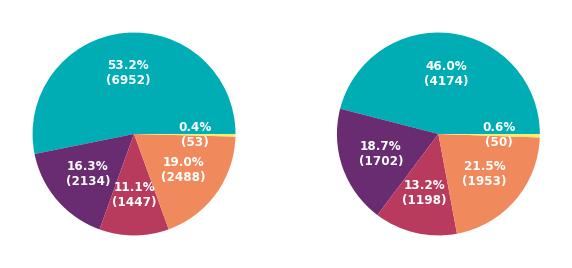

In [61]:
import numpy as np
import matplotlib.pyplot as plt

##画两张饼状图
fig,  ax = plt.subplots(ncols=2,figsize=(10, 10), subplot_kw=dict(aspect="equal"))
AsEvent=[
    '6953 RI',
    '2135 SE',
    '1448 A5SS',
    '2489 A3SS',
    '54 MXE' 
]
geneEvent=[
    '4175 RI',
    '1702 SE',
    '1198 A5SS',
    '1953 A3SS',
    '50 MXE'
]
###绘制剪切事件的比例
data=[float(x.split()[0]) for x in AsEvent]
ingredients=[x.split()[-1] for  x in AsEvent]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts,autotexts= ax[0].pie(
    data,
    autopct=lambda pct: func(pct, data),
    colors=['#00adb5','#6a2c70','#b83b5e','#f08a5d','#f9ed69',]
)

#ax[0].legend(wedges, ingredients,
#          title="AS events",
#          loc="center left",
#          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12, weight="bold",color='w') ##设置标准的字体大小与颜色
##h绘制基因的比例
data=[float(x.split()[0]) for x in geneEvent]
ingredients=[x.split()[-1] for  x in geneEvent]



wedges, texts,autotexts= ax[1].pie(
    data,
    autopct=lambda pct: func(pct, data),  #对回调值进行处理
    colors=['#00adb5','#6a2c70','#b83b5e','#f08a5d','#f9ed69',]
)
plt.setp(autotexts, size=12, weight="bold",color='w') ##设置标准的字体大小与颜色

fig.savefig('TM1_ASPrecentage.png', dpi=150, bbox_inches="tight")